In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
n_samples = 100
n_features = 6 
n_informative = 3 

In [5]:
x, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,random_state=None, shuffle=False,noise=20,coef=True)

In [6]:
df1 = pd.DataFrame(data=x,columns=['x'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])

In [11]:
df=pd.concat([df1,df2],axis=1)

In [12]:
df.head()

,x1,x2,x3,x4,x5,x6,y
0,-0.325466,-0.249661,-1.851016,-0.880163,0.436768,-2.676706,-72.335591
1,-0.299726,0.084635,-0.290837,-0.878705,0.534622,-0.356339,-12.571024
2,1.307783,0.799805,0.772725,0.280691,0.294220,-2.770945,112.701681
3,0.220833,-0.478787,-0.507369,-1.313372,-0.433726,-1.178636,-18.566411
4,0.704853,-0.096462,0.555998,0.951462,1.112432,1.562653,54.030260


In [15]:
#for random forest regression
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(df1,df2)

In [93]:
ytest.reset_index(drop= True, inplace= True)

In [67]:
rfc = RandomForestRegressor(n_estimators = 1000, max_depth = 8, max_features = 4)

In [68]:
rfc.fit(xtrain,ytrain)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [69]:
rfc.score(xtest,ytest)

0.8610774586851397

Relative importance of the features:  [0.74254057 0.09176543 0.07519845 0.02962527 0.03190962 0.02896066]


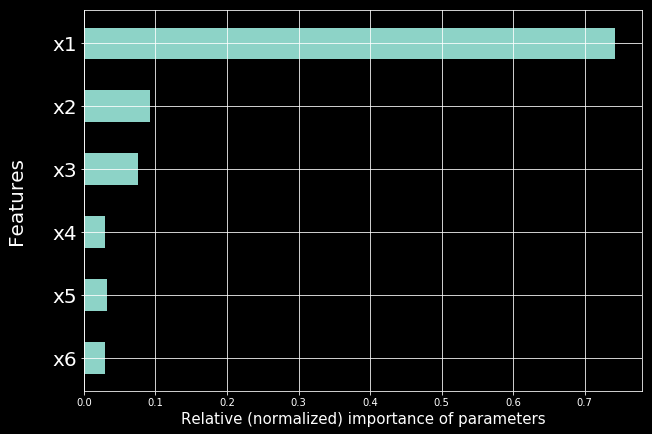

In [75]:
print("Relative importance of the features: ",rfc.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=rfc.feature_importances_,height=0.5)

Relative importance of the features:  [0.86149721 0.0781587  0.01840019 0.01070234 0.02472965 0.00651191]


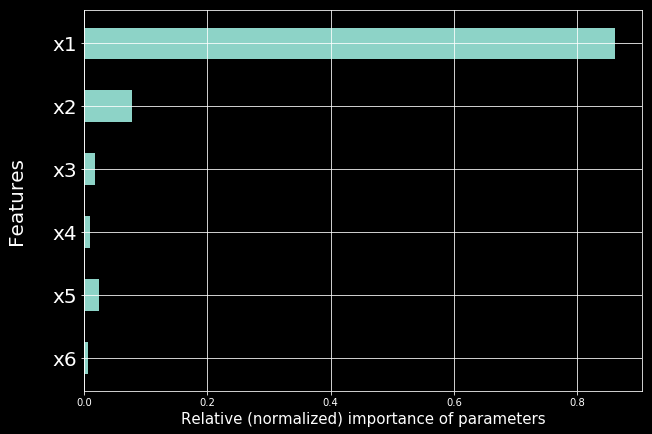

In [74]:
print("Relative importance of the features: ",dtc.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=dtc.feature_importances_,height=0.5)

In [22]:
#for decision tree
from sklearn import tree

In [64]:
dtc = tree.DecisionTreeRegressor()

In [65]:
dtc.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [66]:
dtc.score(xtest,ytest)

0.7624306317996027

In [30]:
#for logistic regression
from sklearn.linear_model import LinearRegression

In [35]:
lmc = LinearRegression()

In [36]:
lmc.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lmc.score(xtest,ytest)

0.9490587451126183

In [77]:
yl= lmc.predict(xtest)
yr= rfc.predict(xtest)
yd= dtc.predict(xtest)

In [78]:
plot = pd.DataFrame()

In [98]:
plot['yl'] = yl
plot['yr'] = yr
plot['yd'] = yd
plot['yt'] = ytest

In [99]:
plot.head()

,yl,yr,yd,yt
0,-20.466198,-36.808298,-35.675538,-29.360900
1,-49.960808,-40.296473,-6.504569,-42.662561
2,104.433281,83.113774,69.740901,98.827824
3,25.525211,42.376096,35.636897,14.672290
4,80.266157,75.515800,67.583494,71.856884


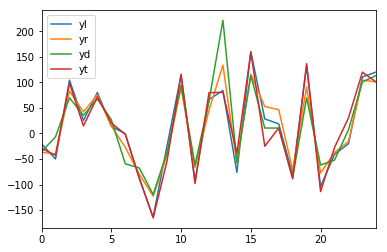

In [100]:
plot.plot.line()